In [3]:
import numpy as np
import matplotlib.pyplot as plt 
import lasio
las1=lasio.read("Gorgonichthys_1_suite3_supercombo_log.las")
las2=lasio.read("Gorgonichthys1_suite2_CMR_NUC_MAINLOG.las")
df1=las1.df()
df2=las2.df()

df1=df1.reset_index()
df2=df2.reset_index()
print(min(df1['DEPTH']))
print(max(df1['DEPTH']))

import pandas as pd
DEPTH,CALI=[],[]
GR,RHOB=[],[]
SPHI,RT=[],[]
DTCO,DTSM=[],[]
NPHI=[]
AT10=[]
AT90=[]

for i in range(len(df1.DEPTH)):
    if df1.DEPTH[i]>=3910 and df1.DEPTH[i]<=4200:
        DEPTH.append(df1.DEPTH[i])
        GR.append(df1.GR[i])
        RHOB.append(df1.RHOB[i])
        SPHI.append(df1.SPHI[i])
        RT.append(df1.RT[i])
        DTCO.append(df1.DTCO[i])
        DTSM.append(df1.DTSM[i])
        AT10.append(df1.AT10[i])
        AT90.append(df1.AT90[i])
        
for i in range(len(df2.DEPTH)):
    if df2.DEPTH[i]>=3910 and df2.DEPTH[i]<=4200:
        NPHI.append(df2.NPHI[i])
        
        CALI.append(df2.CALI[i])

df=pd.DataFrame(zip(DEPTH,CALI,GR,RHOB,NPHI,SPHI,RT,DTCO,DTSM,AT10,AT90),columns=('DEPTH','CALI','GR','RHOB','NPHI','SPHI','RT','DTCO','DTSM','AT10','AT90'))   



3909.06
4775.7588


In [11]:
# OR


# import numpy as np
# import matplotlib.pyplot as plt 
# import lasio
# import pandas as pd

# las1=lasio.read("Gorgonichthys_1_suite3_supercombo_log.las")
# las2=lasio.read("Gorgonichthys1_suite2_CMR_NUC_MAINLOG.las")
# df1=las1.df()
# df2=las2.df()

# df1=df1.reset_index()
# df2=df2.reset_index()

# DEPTH,CALI,GR,RHOB,SPHI,RT=[],[],[],[],[],[]
# DTCO,DTSM,NPHI,AT10,AT90=[],[],[],[],[]

# selected_columns = ['DEPTH', 'GR', 'RHOB', 'SPHI', 'RT', 'DTCO', 'DTSM', 'AT10', 'AT90']
# mask = (df1['DEPTH'] >= 3910) & (df1['DEPTH'] <= 4200)
# df1 = df1[mask][selected_columns]

# data_dict = {col: df1[col].tolist() for col in selected_columns}
# DEPTH, GR, RHOB, SPHI, RT, DTCO, DTSM, AT10, AT90 = [data_dict[col] for col in selected_columns]

# for i in range(len(df2.DEPTH)):
#     if df2.DEPTH[i]>=3910 and df2.DEPTH[i]<=4200:
#         NPHI.append(df2.NPHI[i])        
#         CALI.append(df2.CALI[i])

# df=pd.DataFrame(zip(DEPTH,CALI,GR,RHOB,NPHI,SPHI,RT,DTCO,DTSM,AT10,AT90),columns=('DEPTH','CALI','GR','RHOB','NPHI','SPHI','RT','DTCO','DTSM','AT10','AT90'))   



## 3

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_10580\1073603980.py:35: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot2grid((1,6) , (0,0) ,rowspan=1 , colspan=1)


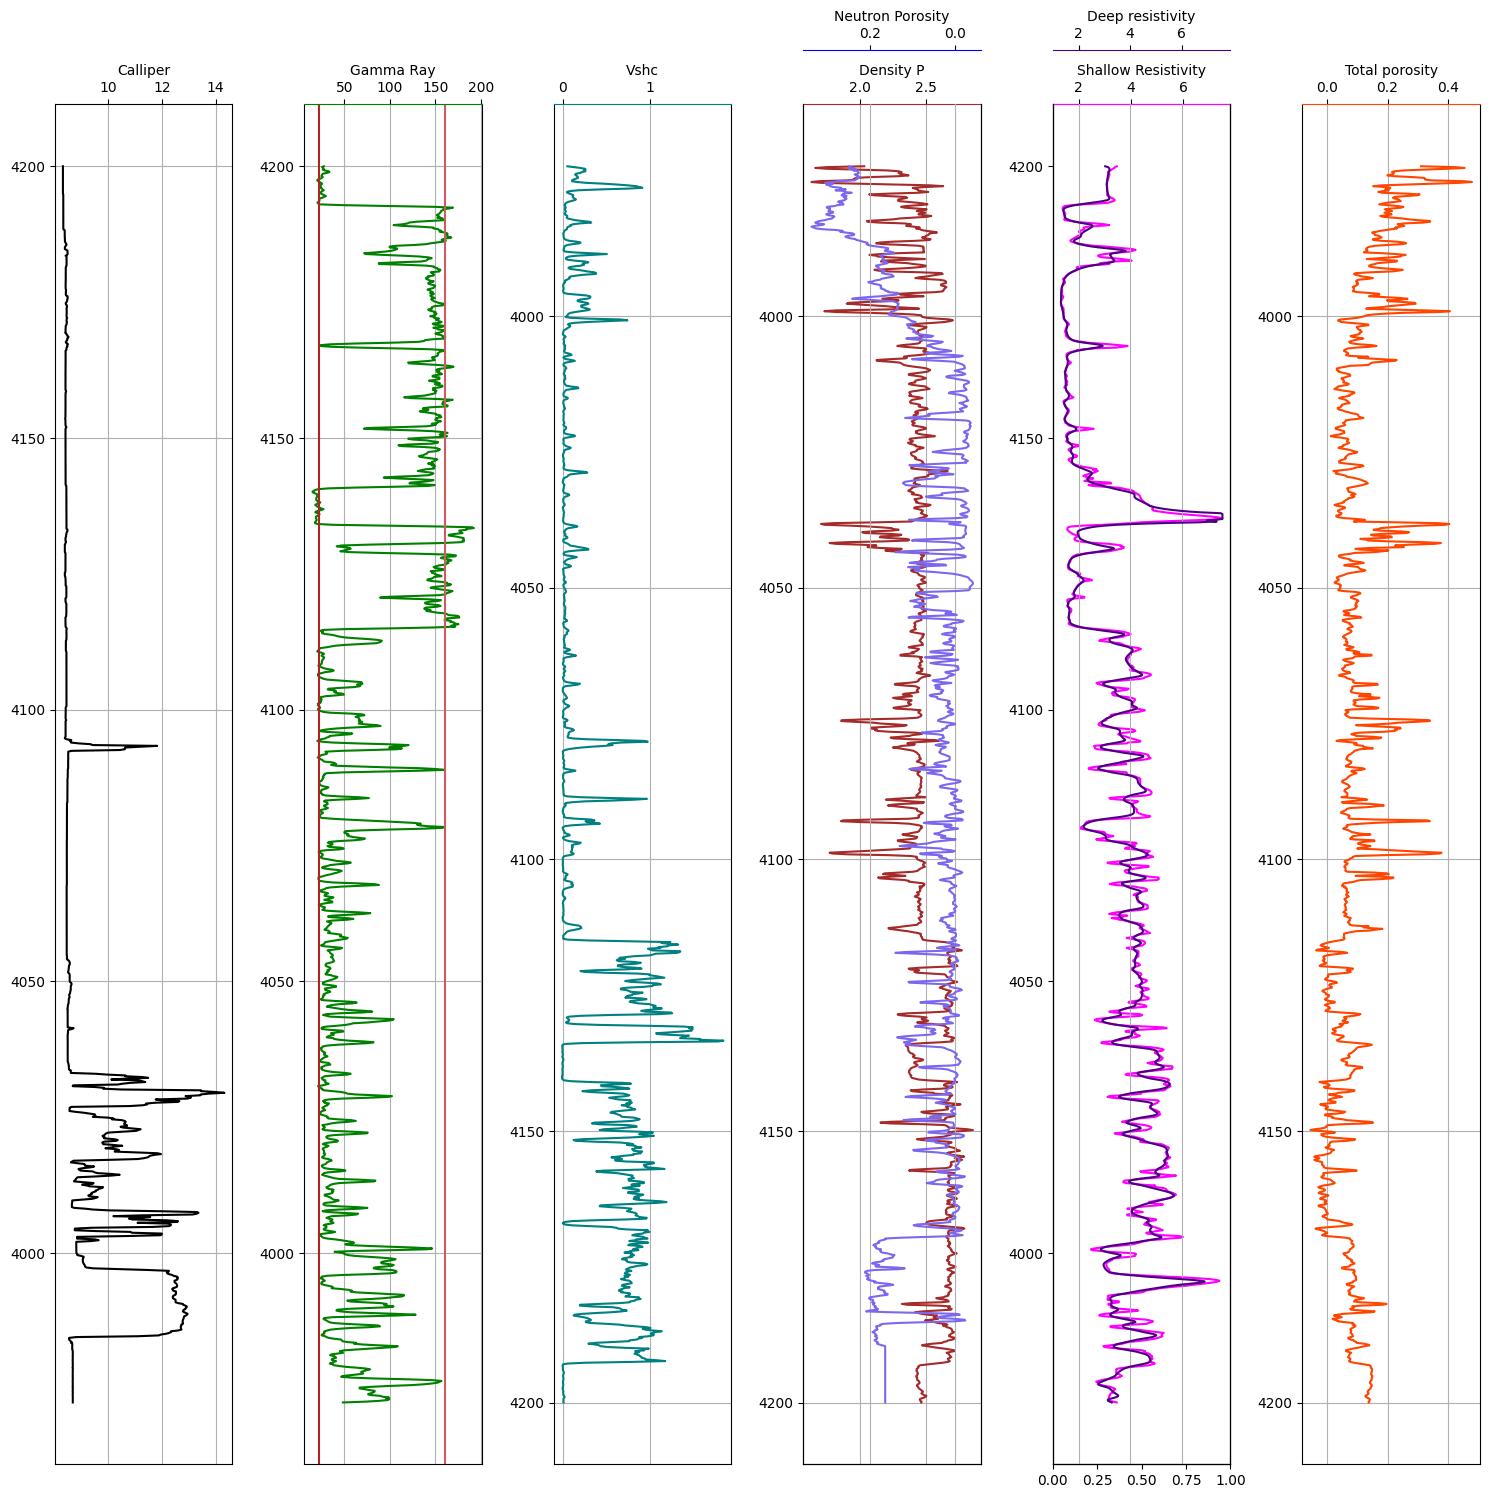

In [2]:
'''Neutron porosity(NPHI) correction'''
NPHI=df['NPHI']-0.04       #Sandstone correction factor
'''Density porosity(DPHI) calculation'''
Psa=2.65    # density of sandstones
Pshc=2.7    # density of shale
Pfl=1       #fluid density
DPHI=(Psa-df['RHOB'])/(Psa-Pfl)

'''volume of shale (Vshc) calculation'''
# Age of rock= Early Cretaceous
p05=df.GR.quantile(0.05)
p95=df.GR.quantile(0.95)
Igr=(df['GR']-p05)/(p95-p05)    # gamma ray index
Vshc = 0.083*(2**(3.7*Igr)-1)   # Vshc calculation for young tertiary rocks

'''Total Porosity calculation'''
Total_Porosity1=((df['NPHI']**2+DPHI**2)/2)**0.5   #for gas bearing formations
Total_Porosity2=(df['NPHI']+DPHI)/2                #for oil, water bearing formations
Total_Porosity=[]
DEPT=[]

#Correcting Total_Porosity for gas regions by considering rms of NPHI and DPHI ,else the average only
for i in range(len(df['DEPTH'])):
    if ((df['GR'][i] <= 90) and (df['RHOB'][i] <=1.9)) or ((NPHI[i] <= 0.08) and  (DPHI[i] >= 0.19) and (df['RHOB'][i] <=1.9)) or ((NPHI[i] <= 0.08) and  (DPHI[i] >= 0.19) and (df['GR'][i] <= 90)):
        Total_Porosity.append(((NPHI[i]**2+DPHI[i]**2)/2)**0.5 )
        DEPT.append(1)
    else:
        Total_Porosity.append((NPHI[i]+DPHI[i])/2)
        DEPT.append(0)      
        
   
'''Plot'''
fig,axes=plt.subplots(figsize=(15,15))
#set up plot axes
ax1=plt.subplot2grid((1,6) , (0,0) ,rowspan=1 , colspan=1)
ax2=plt.subplot2grid((1,6) , (0,1) ,rowspan=1 , colspan=1)
# ax11=ax1.twiny()
ax3=plt.subplot2grid((1,6) , (0,2) ,rowspan=1 , colspan=1)
ax4=plt.subplot2grid((1,6) , (0,3) ,rowspan=1, colspan=1)
ax41=ax4.twiny()
ax5=plt.subplot2grid((1,6) , (0,4) ,rowspan=1 , colspan=1)
ax51=ax5.twiny()
ax52=ax5.twiny()
ax6=plt.subplot2grid((1,6) , (0,5) ,rowspan=1 , colspan=1)

#set up indvidual log tracks/ subplots

ax1.plot(df['CALI'],df['DEPTH'], color='black', lw=1.5)
ax1.spines['top'].set_position(("axes", 1.0))
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Calliper')
ax2.invert_yaxis()
ax1.xaxis.set_label_position('top')
ax1.grid()

ax2.plot(df['GR'],df['DEPTH'], color='g', lw=1.5)
ax2.invert_yaxis()
ax2.spines['top'].set_edgecolor('g')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Gamma Ray')
ax2.axvline(p05,color='firebrick',label='p05')
ax2.axvline(p95,color='indianred',label='p95')
ax2.xaxis.set_label_position('top')
ax2.grid()


       
ax3.plot(Vshc,df['DEPTH'], color='teal', lw=1.5)
ax3.invert_yaxis()
ax3.spines['top'].set_edgecolor('teal')
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('Vshc')
ax3.xaxis.set_label_position('top')
ax3.grid()

pf=1.1
pm=2.71

phi=(pm-df["RHOB"])/(pm-pf)

ax4.plot(df["RHOB"], df['DEPTH'], color='brown', lw=1.5)
ax4.invert_yaxis()
ax4.spines['top'].set_edgecolor('brown')
ax4.xaxis.set_ticks_position('top')
ax4.set_xlabel('Density P')
ax4.xaxis.set_label_position('top')
ax4.grid()

ax41.plot(NPHI,df['DEPTH'], color='mediumslateblue', lw=1.5)
ax41.spines['top'].set_edgecolor('b')
ax41.spines['top'].set_position(("axes", 1.04))
ax41.set_xlabel('Neutron Porosity')
ax41.invert_xaxis()
ax41.xaxis.set_label_position('top')
ax41.grid()

ax51.plot(np.log(df['AT90']),df['DEPTH'], color='magenta', lw=1.5)
ax51.invert_yaxis()
ax51.spines['top'].set_edgecolor('magenta')
ax51.spines['top'].set_position(("axes", 1.0))
ax51.set_xlabel('Shallow Resistivity')
ax51.xaxis.set_label_position('top')

ax52.plot(np.log(df['RT']),df['DEPTH'], color='indigo', lw=1.5)
ax52.invert_yaxis()
ax52.spines['top'].set_edgecolor('indigo')
ax52.spines['top'].set_position(("axes", 1.04))
ax52.set_xlabel('Deep resistivity')
ax52.xaxis.set_label_position('top')
ax52.grid()

ax6.plot(Total_Porosity,df['DEPTH'], color='orangered', lw=1.5)
ax6.invert_yaxis()
ax6.spines['top'].set_edgecolor('orangered')
ax6.xaxis.set_ticks_position('top')
ax6.set_xlabel('Total porosity')
ax6.xaxis.set_label_position('top')
ax6.grid(2)
plt.tight_layout()


## 4

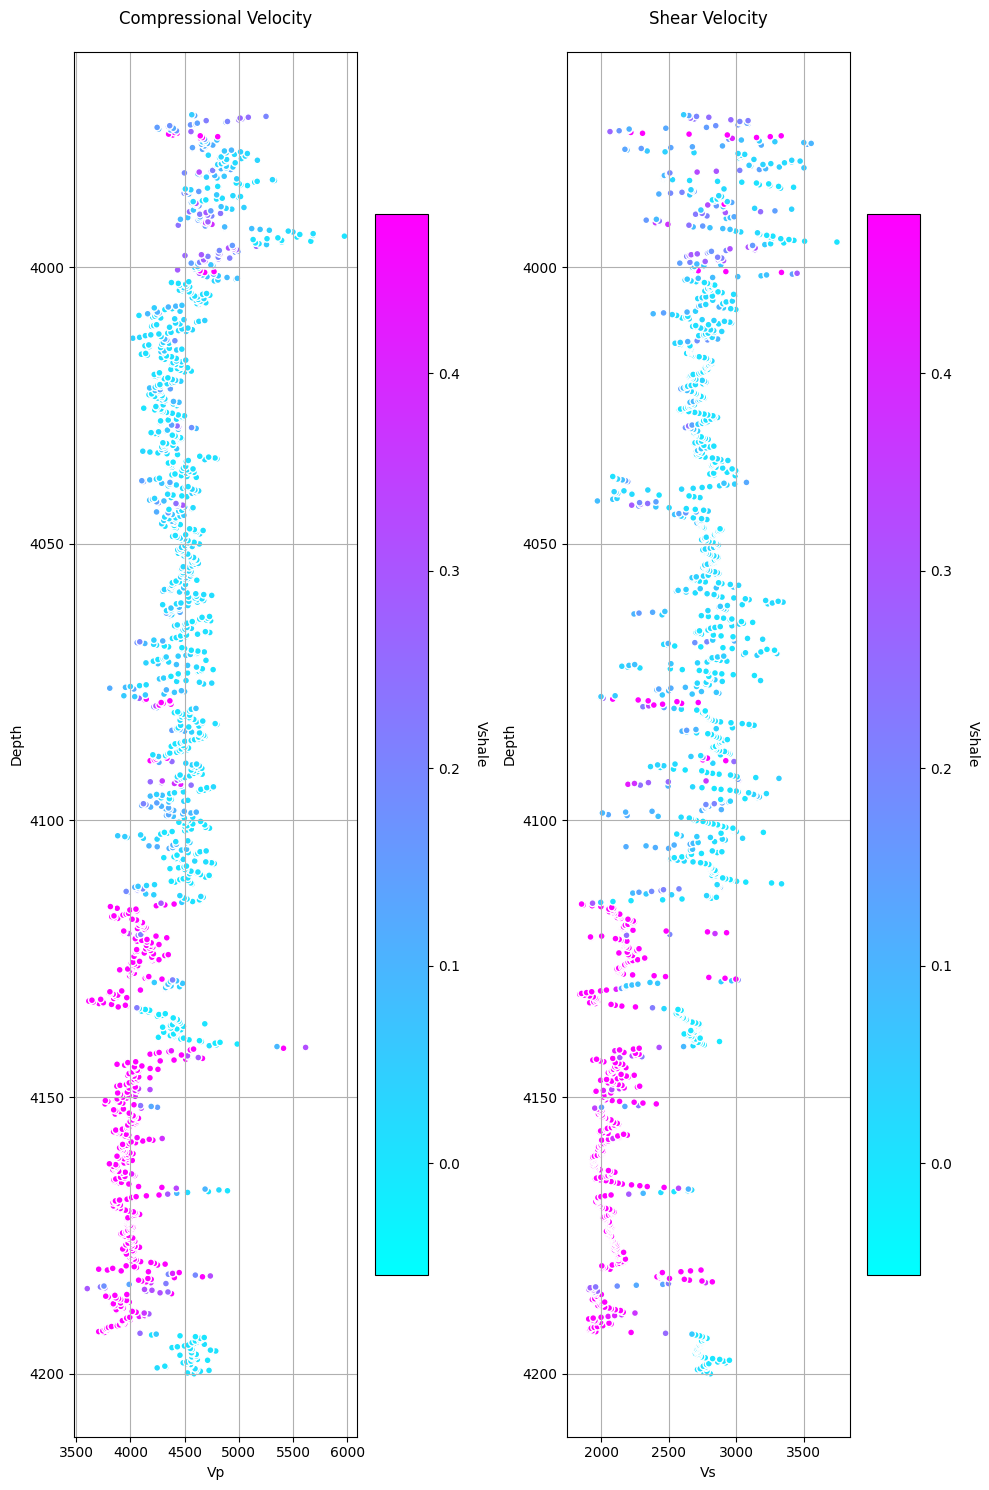

In [3]:


Igr=(df['GR']-p05)/(p95-p05)  
V_sh = 0.083*(2**(3.7*Igr)-1) 

# Vp=304800/df['DTCO']  
# Vs=304800/df['DTSM']   
# plt.figure(figsize=(10,15))
# a=min(Total_Porosity)
# b=max(Total_Porosity)
# c=Vshc.min()
# d=Vshc.max()
# plt.subplot(1,2,1)
# plt.scatter(Vp,df.DEPTH, c = V_sh, marker='o', s=25, edgecolors='w', cmap='cool', vmin=a, vmax=b)
# plt.xlabel('Vp'); plt.ylabel('Depth'); plt.gca().invert_yaxis() ;plt.grid(True)
# plt.colorbar(); plt.title('Compressional Velocity', pad=20); 
# plt.subplot(1,2,2)
# plt.scatter(Vs,df.DEPTH, c = V_sh, marker='o', s=25, edgecolors='w', cmap='cool', vmin=a, vmax=b)
# plt.xlabel('Vs'); plt.ylabel('Depth'); plt.gca().invert_yaxis(); plt.grid(True)
# plt.colorbar(); plt.title('Shear Velocity', pad=20); 
# plt.tight_layout()


Vp = 304800/df['DTCO']  
Vs = 304800/df['DTSM']   
plt.figure(figsize=(10,15))
a = min(Total_Porosity)
b = max(Total_Porosity)
c = Vshc.min()
d = Vshc.max()
plt.subplot(1,2,1)
plt.scatter(Vp,df.DEPTH, c=V_sh, marker='o', s=25, edgecolors='w', cmap='cool', vmin=a, vmax=b)
plt.xlabel('Vp')
plt.ylabel('Depth')
plt.gca().invert_yaxis()
plt.grid(True)
plt.colorbar().set_label('Vshale', rotation=270, labelpad=20)
plt.title('Compressional Velocity', pad=20)
plt.subplot(1,2,2)
plt.scatter(Vs,df.DEPTH, c=V_sh, marker='o', s=25, edgecolors='w', cmap='cool', vmin=a, vmax=b)
plt.xlabel('Vs')
plt.ylabel('Depth')
plt.gca().invert_yaxis()
plt.grid(True)
plt.colorbar().set_label('Vshale', rotation=270, labelpad=20)
plt.title('Shear Velocity', pad=20)
plt.tight_layout()



##  5

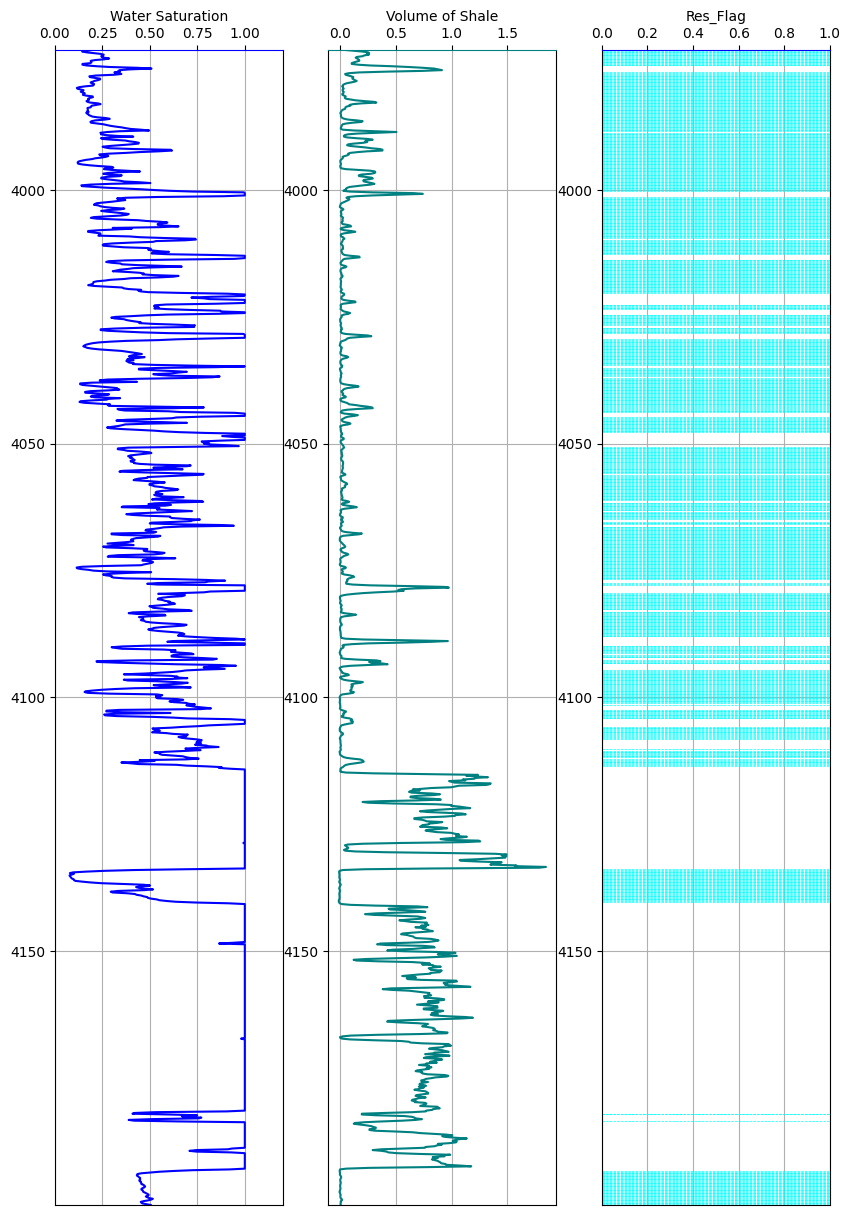

In [4]:
a=1
m=2
n=2
Rw=0.1
Res_Flag=[]
dff=pd.DataFrame(zip(Total_Porosity))
dff.rename(columns={0:'Total_Porosity'},inplace=True) 

'''Water Saturation calculation'''

Sw=(a*Rw/(df['RT']*dff['Total_Porosity']**m))**(1/n)  #Archie's Formula of Water Saturation

# Reservoir Characterization
for i in range(len(df['DEPTH'])):
    if Vshc[i] <= 0.4 and Sw[i] <= 0.7:
        Res_Flag.append(1)
    else:
        Res_Flag.append(0)
        
plt.figure(figsize=(10,15))        
#set up plot axes
ax1=plt.subplot2grid((1,3) , (0,0) ,rowspan=1 , colspan=1)
ax2=plt.subplot2grid((1,3) , (0,1) ,rowspan=1 , colspan=1)
ax3=plt.subplot2grid((1,3) , (0,2) ,rowspan=1, colspan=1)
    
#set up indvidual log tracks/ subplots
y = []
for i in range(len(Sw)):
    if Sw[i] >= 1:
        y.append(1)
    else:
        y.append(Sw[i])
            
ax1.plot(y,df['DEPTH'], color='b', lw=1.5)
ax1.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
ax1.invert_yaxis()
ax1.spines['top'].set_edgecolor('b')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Water Saturation')
ax1.xaxis.set_label_position('top')
ax1.set_xlim(0,1.2)
ax1.grid()

ax2.plot(Vshc,df['DEPTH'], color='teal', lw=1.5)
ax2.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
ax2.invert_yaxis()
ax2.spines['top'].set_edgecolor('teal')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Volume of Shale')
ax2.xaxis.set_label_position('top')
ax2.grid()

for i in range(len(Res_Flag)):
    if Res_Flag[i]==1:
        ax3.axhline(y=df['DEPTH'][i],color='aqua',label='Res_Flag',lw=0.5,ls='--')
        ax3.invert_yaxis()
        ax3.spines['top'].set_edgecolor('b')
        ax3.set_ylim(df['DEPTH'].min(),df['DEPTH'].max())
        ax3.xaxis.set_ticks_position('top')
        ax3.set_xlabel('Res_Flag')
        ax3.xaxis.set_label_position('top')
        ax3.invert_yaxis()
        ax3.grid()


##  6

,Vshc,Sw,Total_Porosity
count,1494.000000,1494.000000,1494.000000
mean,0.282527,inf,0.089379
std,0.378627,NaN,0.076375
min,-0.010822,0.076951,-0.056333
25%,0.010174,0.376341,0.048996
50%,0.050562,0.603445,0.074576
75%,0.634092,1.710478,0.113985
max,1.845672,inf,0.480654


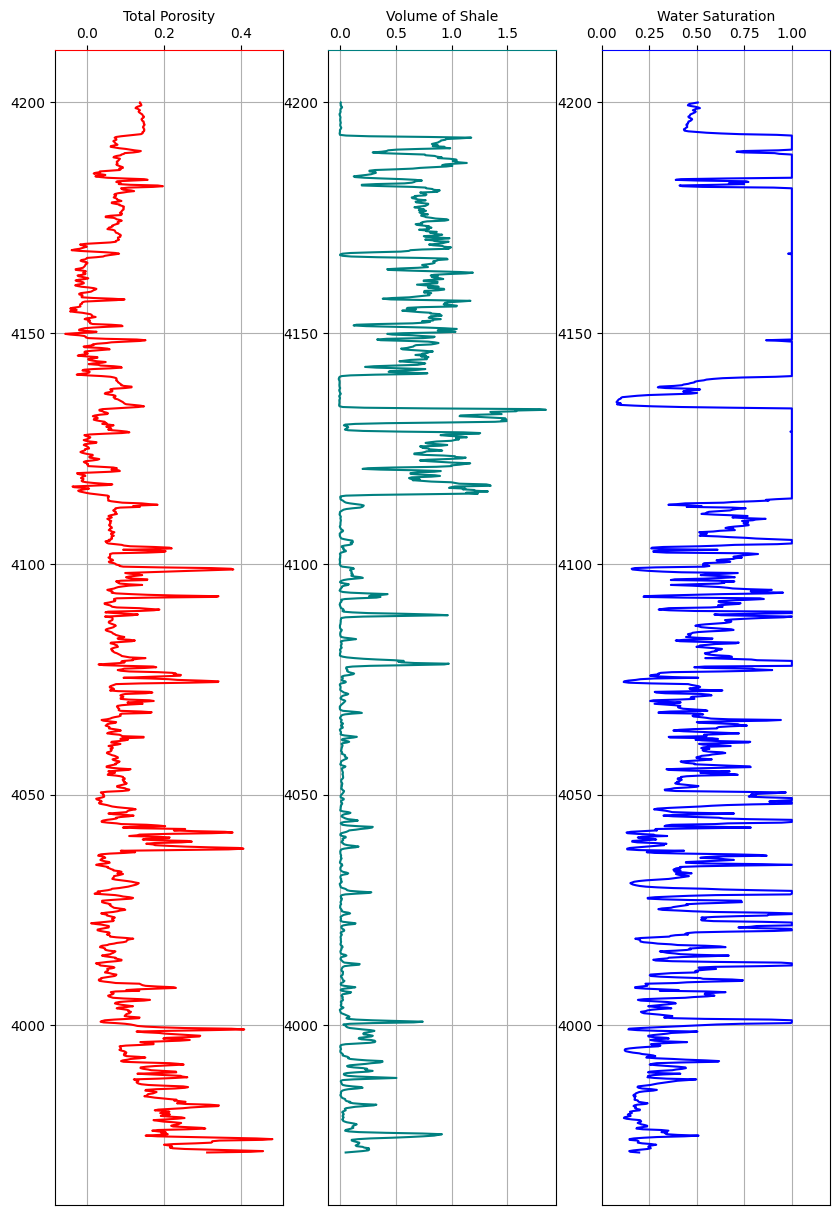

In [5]:
plt.figure(figsize=(10,15))        
#set up plot axes
ax1=plt.subplot2grid((1,3) , (0,0) ,rowspan=1 , colspan=1)
ax2=plt.subplot2grid((1,3) , (0,1) ,rowspan=1 , colspan=1)
ax3=plt.subplot2grid((1,3) , (0,2) ,rowspan=1, colspan=1)
    
#set up indvidual log tracks/ subplots
ax1.plot(Total_Porosity,df['DEPTH'], color='r', lw=1.5)
ax1.spines['top'].set_edgecolor('r')
ax1.xaxis.set_ticks_position('top')
ax1.set_xlabel('Total Porosity')
ax1.xaxis.set_label_position('top')
ax1.grid()

ax2.plot(Vshc,df['DEPTH'], color='teal', lw=1.5)
ax2.spines['top'].set_edgecolor('teal')
ax2.xaxis.set_ticks_position('top')
ax2.set_xlabel('Volume of Shale')
ax2.xaxis.set_label_position('top')
ax2.grid()

ax3.plot(y,df['DEPTH'], color='b', lw=1.5)
ax3.set_xlim(0,10)
ax3.spines['top'].set_edgecolor('b')
ax3.xaxis.set_ticks_position('top')
ax3.set_xlabel('Water Saturation')
ax3.set_xlim(0,1.2)
ax3.xaxis.set_label_position('top')
ax3.grid()

df1=pd.DataFrame(zip(Vshc,Sw,Total_Porosity), columns=('Vshc', 'Sw', 'Total_Porosity'))
df1.describe()


In [6]:
depth_1=[]
gamma_ray_1=[]
neutron_porosity_1=[]
formation_density_1=[]
V_shc=[]
for i in range(len(df.DEPTH)):
        depth_1.append(df.DEPTH[i])
        gamma_ray_1.append(df.GR[i])
        neutron_porosity_1.append(df.NPHI[i])
        formation_density_1.append(df.RHOB[i])
        V_shc.append(Vshc[i])


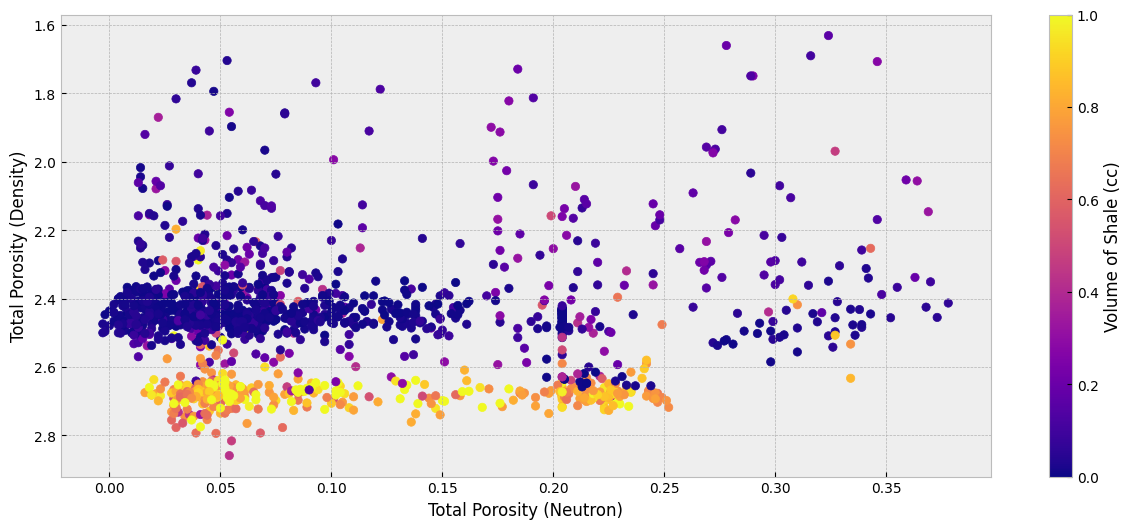

In [7]:
plt.style.use('bmh')
fig,ax=plt.subplots(figsize=(15,6))
plot=ax.scatter(x=neutron_porosity_1,y=formation_density_1,c=V_shc,vmin=0,vmax=1,cmap='plasma')
ax.set_xlabel('Total Porosity (Neutron)')
ax.set_ylabel('Total Porosity (Density)')
ax.invert_yaxis()
plt.colorbar(plot,label='Volume of Shale (cc)')
plt.show()

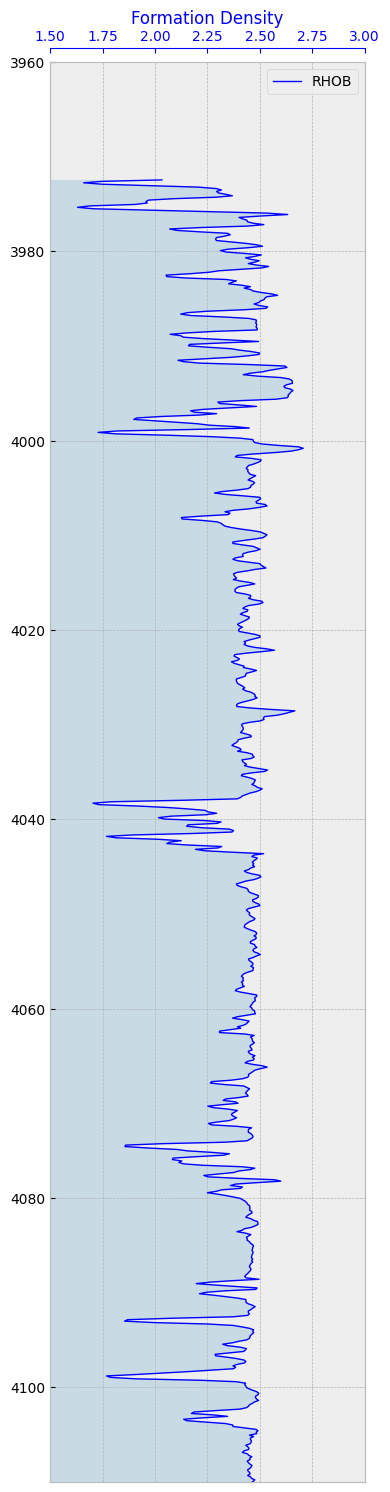

Text(0.5, 0, 'Formation Density')

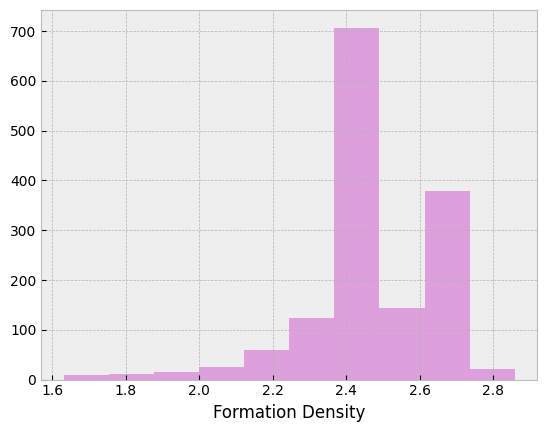

In [8]:
fig,ax=plt.subplots(figsize=(4,15))
ax.twiny().xaxis.set_visible(False)
ax.plot(df['RHOB'],df['DEPTH'],color='blue',linewidth='1',label='RHOB')
ax.fill_betweenx(df['DEPTH'],0,df['RHOB'],where=(df['RHOB']>0),alpha=0.2)
ax.set_xlim(1.5,3)
# ax.set_xticks([1.95,3])
ax.set_xlabel('Formation Density',color='blue')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x',colors='blue')
ax.spines.top.set_edgecolor('blue')
ax.spines.top.set_position(('axes',1.01))
ax.set_ylim(4110,3960)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()
# plt.figure(figsize=(4,15))
plt.hist(df['RHOB'], color='plum')
plt.xlabel('Formation Density')

In [9]:
Rho_b=np.zeros(len(df['RHOB']))
for i in range(len(df['RHOB'])):
    if df['RHOB'][i]>=2.85 or df['RHOB'][i]<=2.2:
        Rho_b[i]=df['RHOB'].median()
    else:
        Rho_b[i]=df['RHOB'][i]

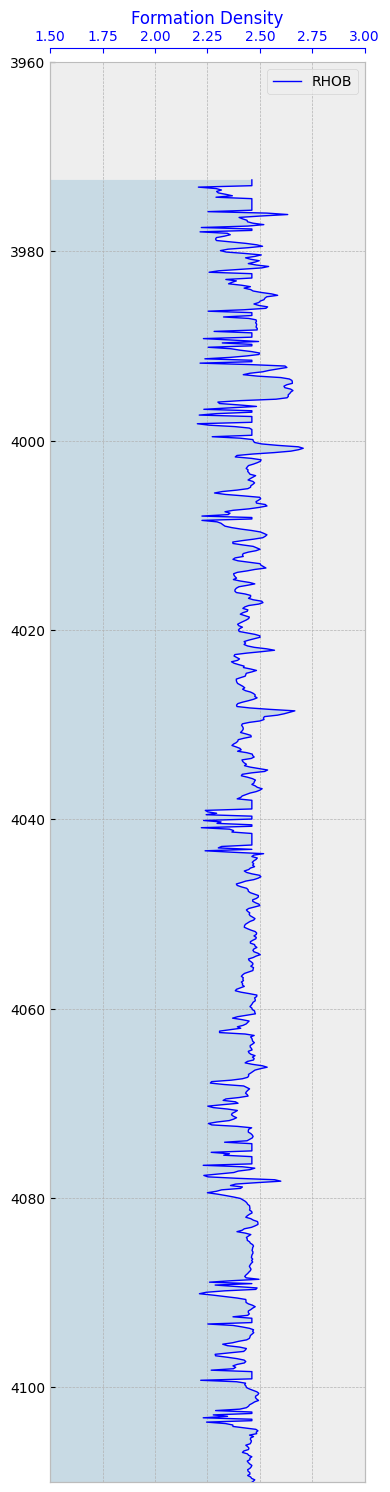

In [10]:
#after removing outliers
fig,ax=plt.subplots(figsize=(4,15))
ax.twiny().xaxis.set_visible(False)
ax.plot(Rho_b,df['DEPTH'],color='blue',linewidth='1',label='RHOB')
ax.fill_betweenx(df['DEPTH'],0,Rho_b,where=(df['RHOB']>0),alpha=0.2)
ax.set_xlim(1.5,3)
# ax.set_xticks([1.95,3])
ax.set_xlabel('Formation Density',color='blue')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(axis='x',colors='blue')
ax.spines.top.set_edgecolor('blue')
ax.spines.top.set_position(('axes',1.01))
ax.set_ylim(4110,3960)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

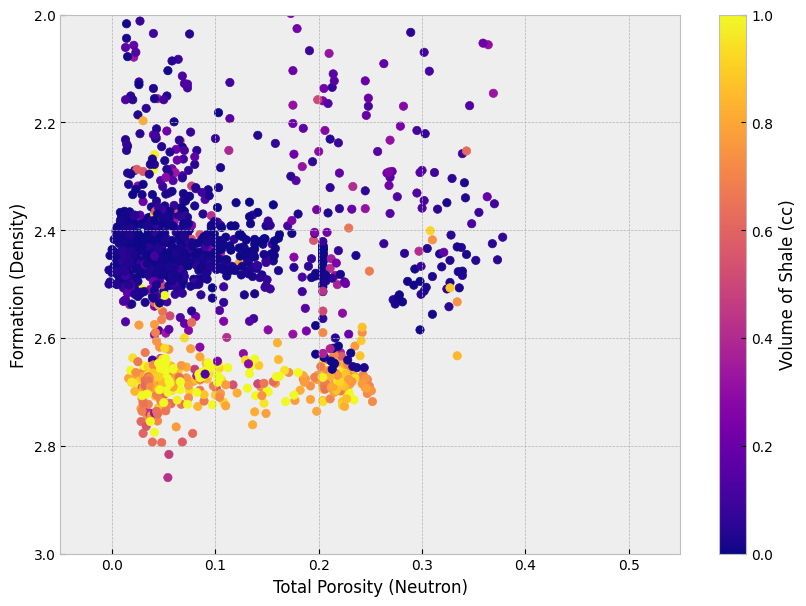

In [19]:
depth_1=[]
gamma_ray_1=[]
neutron_porosity_1=[]
formation_density_1=[]
V_shc=[]
for i in range(len(df.DEPTH)):
        depth_1.append(df.DEPTH[i])
        gamma_ray_1.append(df.GR[i])
        neutron_porosity_1.append(df.NPHI[i])
        formation_density_1.append(df.RHOB[i])
        V_shc.append(Vshc[i])








plt.style.use('bmh')
fig,ax=plt.subplots(figsize=(10,7))
plot=ax.scatter(x=neutron_porosity_1,y=formation_density_1,c=V_shc,vmin=0,vmax=1,cmap='plasma')
ax.set_xlabel('Total Porosity (Neutron)')
ax.set_ylabel('Formation (Density)')
ax.invert_yaxis()
ax.set_xlim(-0.05,0.55)
ax.set_ylim(3,2)

plt.colorbar(plot,label='Volume of Shale (cc)')
plt.show()